## Mục tiêu đề tài: 
Phân tích bộ dữ liệu lịch sử Olympic (120 năm):
- Xu hướng phát triển của thể thao thế giới (số lượng, giới tính).
- Những quốc gia nào đang thống trị bảng tổng sắp huy chương?
- Các yếu tố ngoại cảnh (Chính trị, Sân nhà) ảnh hưởng thế nào đến thành tích?
- **Dấu ấn Việt Nam:** Hành trình hội nhập và những cột mốc lịch sử.

In [ ]:
import sys
!{sys.executable} -m pip install scikit-learn 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from modules.data_loader import load_data
import modules.visualization as viz
from modules.data_cleaning import clean_data
# Tải dữ liệu
print(">>> Đang tải dữ liệu từ file CSV...")
df_goc = load_data('data/athlete_events.csv')
df = clean_data(df_goc)
# Xử lý dữ liệu 
if df is not None:
    df['Medal'] = df['Medal'].fillna('No Medal')
    
    print(f"Tải thành công! Kích thước dữ liệu: {df.shape[0]} dòng, {df.shape[1]} cột.")
    display(df.head()) 
else:
    print("Lỗi: Không tìm thấy file dữ liệu.")

## 2. Phần A: Tổng quan Thể thao Thế giới
Toàn cảnh về sự thay đổi của Olympic qua hơn một thế kỷ.

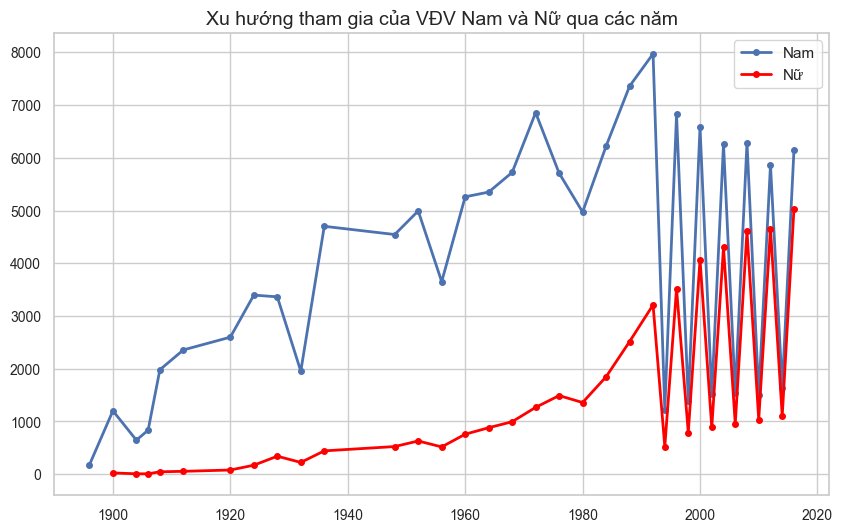

In [3]:
# Biểu đồ 1: Xu hướng tham gia của Nam và Nữ
viz.plot_gender_trend(df)

### Nhận xét - Hình 1: Bình đẳng giới trong thể thao
Biểu đồ đường cho thấy hai xu hướng rõ rệt:
 - Tổng số lượng VĐV tăng trưởng mạnh mẽ, đặc biệt là giai đoạn sau năm 1960
 - Đường màu đỏ (Nữ) gần như đi ngang ở mức thấp trong suốt nửa đầu thế kỷ 20. Tuy nhiên, từ những năm 1980, độ dốc tăng trưởng của Nữ rất cao, thu hẹp dần khoảng cách với Nam giới. Điều này phản ánh nỗ lực toàn cầu trong việc đấu tranh cho bình đẳng giới trong thể thao.

## Thành tích các Quốc gia
Quốc gia nào đang thống trị bảng tổng sắp huy chương trong lịch sử?

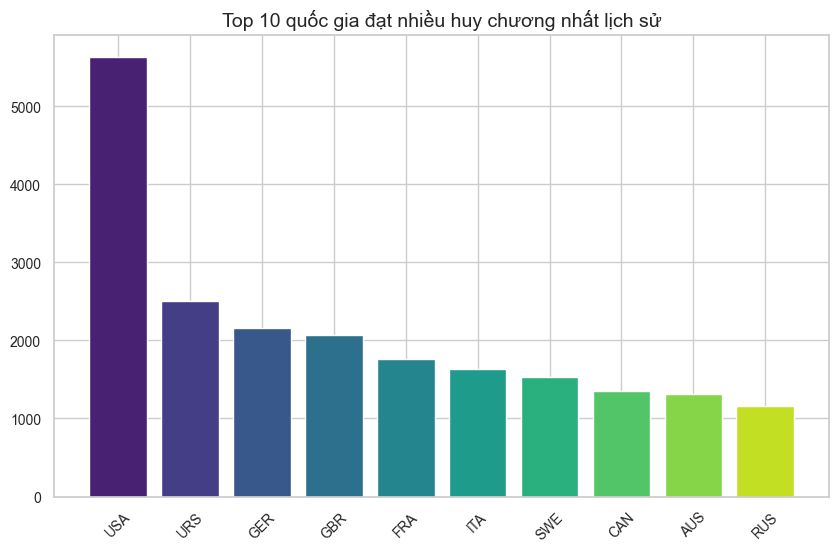

In [4]:
# Biểu đồ 2: Top 10 Quốc gia đạt nhiều huy chương nhất
viz.plot_top_medals(df)

### Hình 2: Các cường quốc thể thao
- **Mỹ (USA)** thống trị tuyệt đối bảng tổng sắp với khoảng cách rất xa so với phần còn lại. Điều này dễ hiểu nhờ nền kinh tế phát triển và hệ thống thể thao học đường mạnh mẽ.
- **Liên Xô (URS)** dù đã tan rã nhưng vẫn đứng thứ 2, cho thấy sức mạnh khủng khiếp của thể thao Xô Viết trong quá khứ.
- Các vị trí còn lại thuộc về các nước châu Âu (Đức, Anh, Pháp, Ý) và Trung Quốc (đại diện châu Á duy nhất trong top đầu).


## Biểu đồ Phân bố tuổi, chiều cao, cân nặng

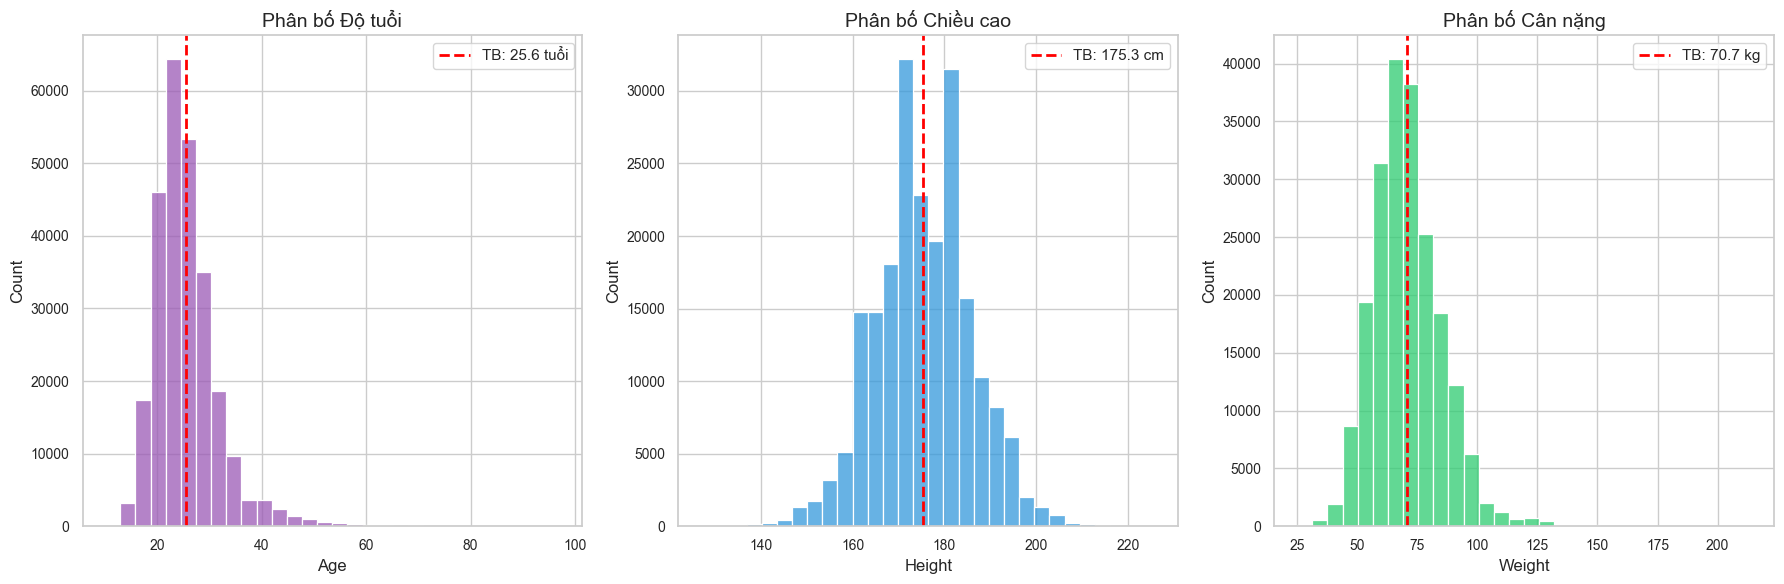

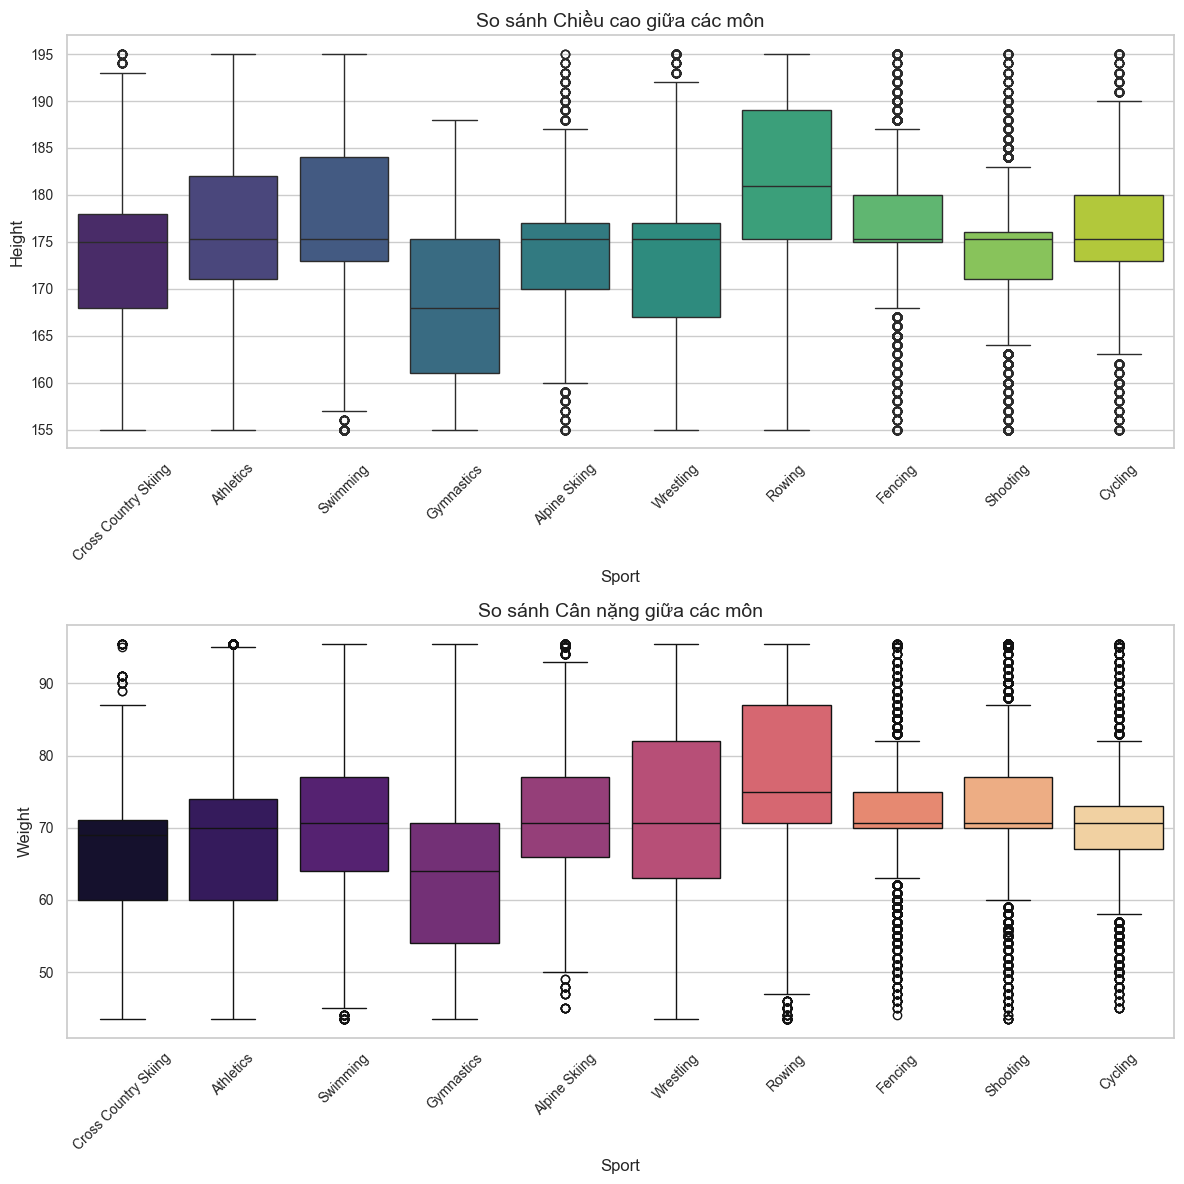

In [5]:
# Biểu đồ 3a: Phân bố thể chất chung (Tuổi, Chiều cao, Cân nặng)
viz.plot_physical_distribution(df_goc)

# Biểu đồ 3b: So sánh thể chất giữa các môn thể thao
viz.plot_physical_comparison_by_sport(df)

### Nhận xét - Hình 3: Đặc điểm sinh học và Sự đa dạng thể chất
**1. Tổng quan (Hình 3a):**
- **Độ tuổi:** Phân phối lệch phải, tập trung chủ yếu ở 20-25 tuổi.
- **Chiều cao & Cân nặng:** Có dạng phân phối chuẩn.
    - Chiều cao trung bình khoảng **175cm**.
    - Cân nặng trung bình khoảng **70kg**.
Điều này cho thấy đa số VĐV Olympic có thể hình vượt trội so với người bình thường cùng thời kỳ.

**2. Sự khác biệt giữa các môn (Hình 3b):**
Biểu đồ Boxplot cho thấy sự phân hóa rõ rệt phù hợp với yêu cầu chuyên môn:
- **Basketball (Bóng rổ) & Rowing (Đua thuyền):** Là những nhóm VĐV có chiều cao và cân nặng "khủng" nhất.
- **Gymnastics (Thể dục dụng cụ):** Có đặc điểm ngược lại, VĐV thường nhỏ nhắn, nhẹ cân để thực hiện các động tác nhào lộn linh hoạt.
- **Athletics (Điền kinh) & Swimming (Bơi lội):** Có dải phân bố rất rộng, chứng tỏ sự đa dạng về nội dung thi đấu (ví dụ: VĐV chạy bền sẽ gầy hơn VĐV ném tạ, dù cùng là Điền kinh).

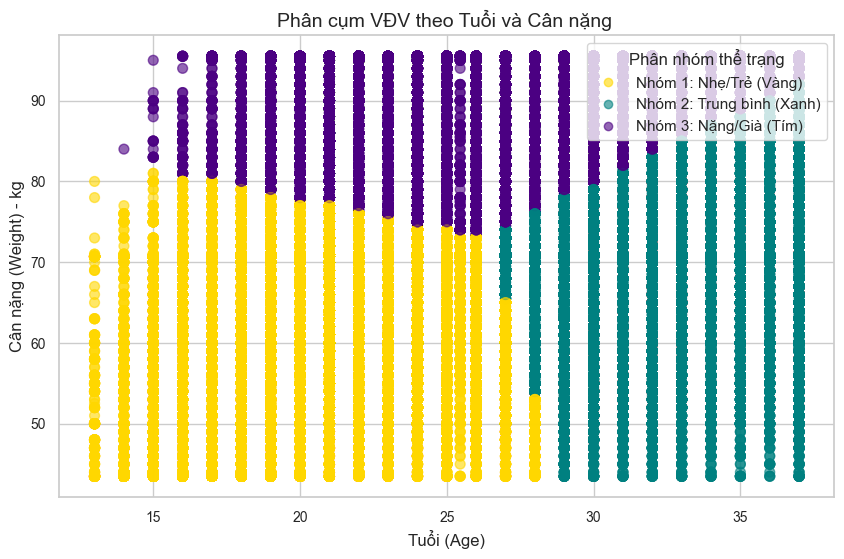

In [6]:
# Biểu đồ 3c: Phân cụm Vận động viên
viz.plot_athlete_clustering(df)

#### 🟡 1. Nhóm Màu Vàng (Nhóm Nhẹ cân & Trẻ tuổi)
* **Đặc điểm:** Tập trung ở vùng cân nặng thấp (dưới 60kg) và độ tuổi trẻ.
* **Môn thể thao điển hình:** Đây thường là các VĐV thuộc các môn đòi hỏi sự khéo léo, linh hoạt và trọng lượng cơ thể nhẹ để dễ dàng bay lượn như **Gymnastics**, **Diving** hoặc **Figure Skating**.

#### 🔵 2. Nhóm Màu Xanh (Nhóm Trung bình - Phổ biến nhất)
* **Đặc điểm:** Cân nặng và độ tuổi ở mức trung bình (khoảng 60kg - 85kg).
* **Môn thể thao điển hình:** Đây là thể trạng chuẩn của đa số các môn thể thao olympic đòi hỏi sự cân bằng giữa sức bền và tốc độ như **Athletics**, **Swimming**, **Football**.

#### 🟣 3. Nhóm Màu Tím (Nhóm Nặng cân & Lớn tuổi)
* **Đặc điểm:** Tập trung ở vùng cân nặng lớn (trên 90kg) hoặc độ tuổi cao.
* **Môn thể thao điển hình:**
    * Những điểm ở phía trên cao (rất nặng): Là các VĐV cần sức mạnh cơ bắp bùng nổ như **Weightlifting**, **Judo**, **Wrestling (Đấu vật)**.
    * Những điểm rải rác về phía bên phải (lớn tuổi): Thường là các môn ít tiêu tốn thể lực hơn, cho phép VĐV thi đấu lâu dài như **Shooting**, **Equestrianism**.

**Kết luận:** Dữ liệu cho thấy sự phân hóa rõ rệt về mặt sinh học. Không có một "thể trạng chuẩn" duy nhất cho Olympic, mà mỗi môn thể thao sẽ tuyển chọn những đặc điểm hình thể riêng biệt (chuyên biệt hóa).

## 3. Phần B: Phân tích Chuyên sâu

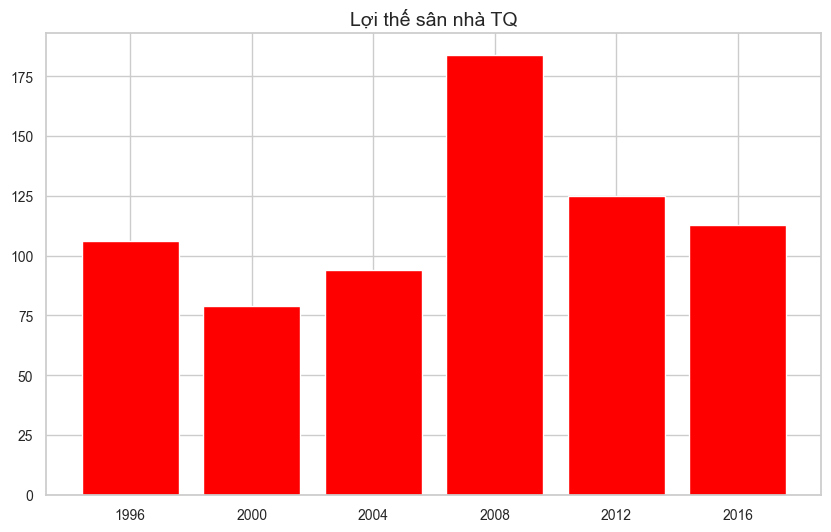

In [7]:
# Biểu đồ 5: Lợi thế sân nhà (Trung Quốc 2008)
viz.plot_host_advantage_china(df)

### Hiệu ứng "Lợi thế sân nhà" 
Biểu đồ thành tích của Trung Quốc minh chứng rõ ràng cho giả thuyết này:
- Năm 2008 (đăng cai Olympic Bắc Kinh), số huy chương của Trung Quốc **tăng vọt lên mức kỷ lục** (cột màu đỏ đậm).
- Ngay sau đó (2012, 2016), khi phải thi đấu ở nước ngoài, thành tích giảm xuống mức bình thường.
- **Lý do:** Nước chủ nhà được quyền tham gia đủ các môn, VĐV quen thuộc khí hậu, sân bãi và nhận được sự cổ vũ cuồng nhiệt từ khán giả nhà.

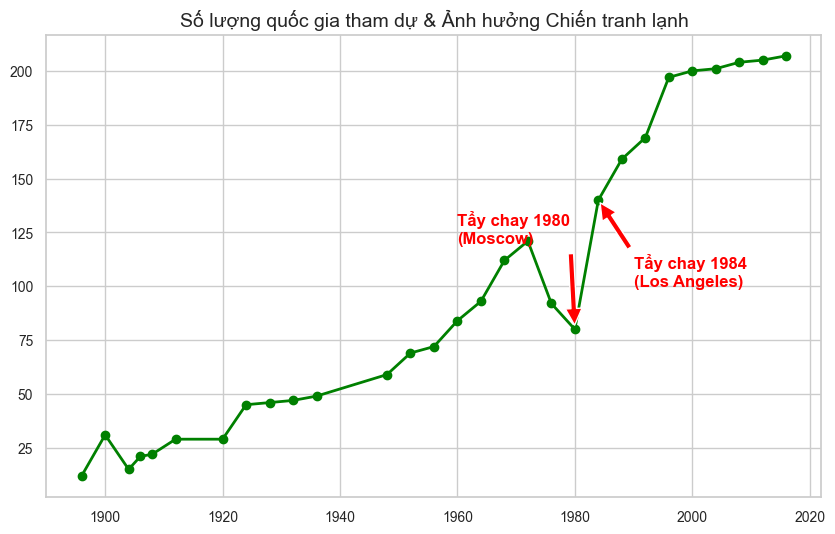

In [8]:
# Biểu đồ 7: Ảnh hưởng của Chiến tranh lạnh
viz.plot_geopolitics_impact(df)

### Thể thao và Chính trị
Dữ liệu kể lại câu chuyện lịch sử Chiến tranh Lạnh thông qua hai "hố sâu" trên biểu đồ:
1.  **Năm 1980 (Moscow):** Số lượng quốc gia tham dự giảm mạnh do khối phương Tây (dẫn đầu là Mỹ) tẩy chay.
2.  **Năm 1984 (Los Angeles):** Số lượng vẫn thấp do khối Đông Âu (dẫn đầu là Liên Xô) tẩy chay để trả đũa.
=> Điều này khẳng định: Các sự kiện địa chính trị lớn có tác động trực tiếp và tiêu cực đến quy mô của Thế vận hội.

## 4. Phần C: Dấu ấn Việt Nam 
Phân tích hành trình hội nhập và thành tích của Thể thao Việt Nam.

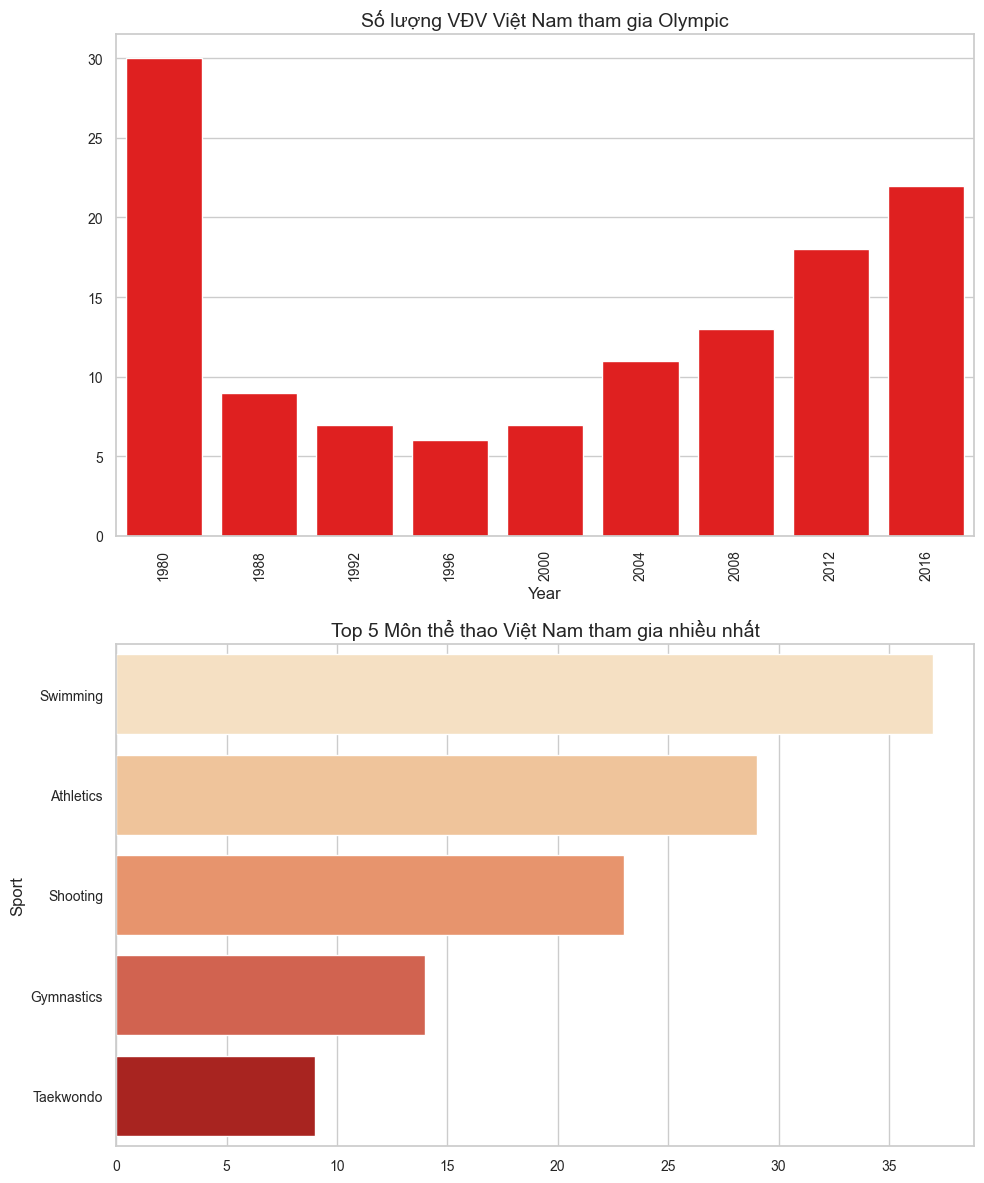

In [9]:
# Biểu đồ 8: Tổng quan Việt Nam (Số lượng & Môn thế mạnh)
viz.plot_vietnam_stats(df)

### Nhận xét - Hình 8: Hành trình Việt Nam
- **Số lượng tham gia:** Việt Nam bắt đầu tham gia đông đảo từ năm 1980 (Olympic Moscow). Sau giai đoạn gián đoạn, số lượng VĐV tăng dần đều từ năm 2000 đến 2016.
- **Môn thế mạnh:** Biểu đồ ngang cho thấy Việt Nam tập trung vào các môn cơ bản của Olympic là **Bơi lội (Swimming)** và **Điền kinh (Athletics)**, bên cạnh đó là **Bắn súng** và **Cử tạ**.
- **Các ngôi sao vàng:** Các ngôi sao trên biểu đồ đánh dấu những năm Việt Nam có huy chương (2000, 2008, 2016).

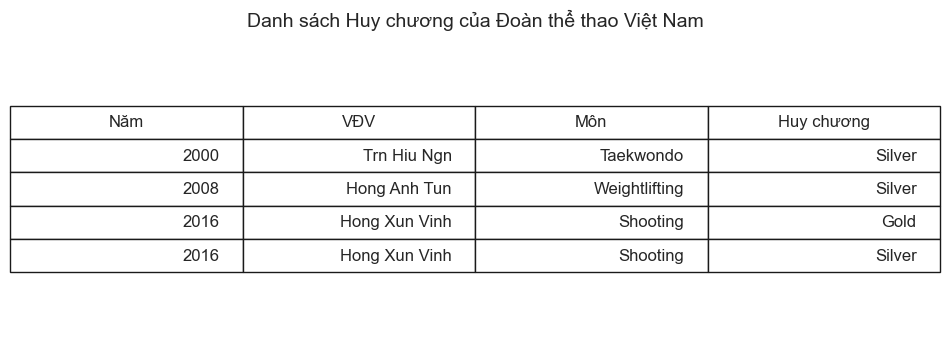

In [10]:
# Biểu đồ 9: Danh sách huy chương chi tiết
viz.plot_vietnam_details(df)

### Tổng kết về Thành tích Việt Nam
Bảng danh sách trên vinh danh những người hùng của thể thao nước nhà:
1.  **Trần Hiếu Ngân (2000):** Tấm Huy chương Bạc Taekwondo lịch sử - đánh dấu lần đầu tiên Việt Nam có tên trên bản đồ huy chương Olympic.
2.  **Hoàng Anh Tuấn (2008):** Huy chương Bạc Cử tạ xuất sắc.
3.  **Hoàng Xuân Vinh (2016):** Đỉnh cao chói lọi với 1 Vàng, 1 Bạc môn Bắn súng. Đây là lần đầu tiên Quốc ca Việt Nam được vang lên tại đấu trường thể thao lớn nhất hành tinh.